In [25]:
import pandas as pd
import re
import numpy as np
from nltk import word_tokenize

## Load dataset

In [26]:
root = 'Dataset/emotion/'

train_0_df_raw = pd.read_csv(root+'raw/train_0.txt', sep='\t', header=None, names=['label', 'source', 'sentence']) 
train_1_df_raw = pd.read_csv(root+'raw/train_1.txt', sep='\t', header=None, names=['label', 'source', 'sentence']) 
test_df_raw = pd.read_csv(root+'raw/test.txt', sep='\t', header=None, names=['label', 'source', 'sentence']) 
dev_df_raw = pd.read_csv(root+'raw/dev.txt', sep='\t', header=None, names=['label', 'source', 'sentence']) 

In [27]:
print('\n'.join([i for i in test_df_raw[test_df_raw['source']=='tweets']['sentence'].iloc[:20]]))

@PressSec sounds so defensive  &amp; combative whenever he is asked a question by the press. Why is that? #Sad
RT @daveweigel: Hypocrisy and politics go hand in hand, but the "no time for CBO score, go go go" approach to AHCA really betrays 7 years o…
RT @DavidCornDC: This may be outrageous. It is not surprising. No one should pretend it is. https://t.co/lA5GSpZByT
RT @DavidCornDC: If only we could catch Trump on video saying what he really thinks about women!
#Cheers &amp; #Happy #InternationalWomensDay from all of us at #Columbia Wine Co.  #love #respect #wine #dranks… https://t.co/2m2KOqMb2c
#happy #wednesday #evening with #fashion #elegance #style #design in #black &amp; #white made by… https://t.co/BIWamXkmyQ
#happy #wednesday #evening with #fashion #elegance #style #design in #black &amp; #white made by… https://t.co/BaWUPrc5ui
#happy #wednesday #evening with #fashion #elegance #style #design in #black &amp; #white made by… https://t.co/o7k6KpTyBj
#happy #wednesday #evening with 

# combine dataset

In [44]:
all_df = pd.concat([train_0_df_raw, train_1_df_raw, test_df_raw, dev_df_raw])
all_df.shape

(57834, 3)

## drop noemo examples

In [45]:
all_df = all_df[all_df['label']!='noemo']
all_df.shape

(54956, 3)

## clean tweet and drop empty row

In [ ]:
def clearn_tweet(text):
    #text = re.sub(r"#(\w+)", ' ', text, flags=re.MULTILINE)
    text = re.sub(r"@(\w+)", ' ', text, flags=re.MULTILINE)
    #text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', text, flags=re.MULTILINE)
    #text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)', '', text, flags=re.MULTILINE)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"&amp", "", text)
    return text.strip()

In [46]:
all_df['sentence']= [clearn_tweet(i) for i in all_df['sentence']]
all_df['sentence'].replace('', np.nan, inplace=True)
all_df.dropna(subset=['sentence'], inplace=True)
all_df.shape

(54947, 3)

In [48]:
for i, sent in enumerate(all_df['sentence']):
    if len(word_tokenize(sent)) <= 1:
        print(i, '\n', sent, '\n')#, all_df_raw['sentence'].iloc[i] )

2737 
 Headache 

2772 
 headache 

3873 
 sorry 

4108 
 yeah 

5096 
 Headache 

6251 
 BRAINFREEZE 

6522 
 lame 

6771 
 sadface 

7568 
 Damn 

8357 
 ME 

8516 
 lonely 

9076 
 FAIL 

9155 
 courgette 

9397 
 ... 

9459 
 Chilliin 

9501 
 Thanks 

9668 
 woot 

9732 
 TEAR* 

9849 
 Goodmorning 

9948 
 thanks 

9996 
 thankyou 

10437 
 together 

10779 
 speechless 

10972 
 iloveyoumoreeee 

11877 
 awe 

12203 
 yeah 

12275 
 Memories 

12656 
 anytime 

12982 
 okey 

13004 
 Thanks 

13187 
 awesomeness 

13353 
 thanks 

13366 
 Thanks 

13370 
 Thanks 

13439 
 boffert 

13549 
 hii 

13607 
 Thanks 

15726 
 revenge 

16144 
 resent 

16596 
 testing 

16737 
 terrible 

17147 
 alarming 

17528 
 shocking 

17672 
 bully 

19480 
 depressing 

23271 
 Absolutely 

23426 
 thanks 

23580 
 morning 

23937 
 morning 

24096 
 Thanks 

24322 
 thanks 

24496 
 Thx 

24673 
 Thanks 

24880 
 thanks 

24934 
 Goooooodmorning 

25119 
 Hey 

25213 
 Hahaaaha 

25590 
 gra

In [49]:
labels = list(all_df['label'].unique())
all_df['label'].value_counts()

joy         15609
fear        12874
sadness     10241
anger        5389
love         3819
surprise     3116
disgust      1710
shame        1096
guilt        1093
Name: label, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train = []
test = []
for label in labels:
    tran_temp, test_temp = train_test_split(all_df[all_df['label']==label], test_size=500, shuffle=True, stratify=all_df[all_df['label']==label]['source'])
    train.append(tran_temp)
    test.append(test_temp)

In [52]:
train_df = pd.concat(train, ignore_index=True)
test_df = pd.concat(test, ignore_index=True)

In [53]:
test_df['label'].value_counts()

disgust     500
shame       500
love        500
sadness     500
anger       500
joy         500
surprise    500
guilt       500
fear        500
Name: label, dtype: int64

In [54]:
train_df['label'].value_counts()

joy         15109
fear        12374
sadness      9741
anger        4889
love         3319
surprise     2616
disgust      1210
shame         596
guilt         593
Name: label, dtype: int64

In [55]:
train_0_labels = ['joy', 'fear', 'sadness','anger', 'love']
train_0_df = train_df[train_df['label'].isin(train_0_labels)]
train_0_df.shape

(45432, 3)

In [56]:
noval_labels = ['surprise', 'disgust', 'shame', 'guilt']
support_labels = ['joy', 'fear', 'sadness','anger', 'love']
noval_df = test_df[test_df['label'].isin(noval_labels)]
sup_df = test_df[test_df['label'].isin(support_labels)]

In [57]:
noval_df.shape, sup_df.shape

((2000, 3), (2500, 3))

In [58]:
train_df.to_csv(root + 'train_full.csv', index=False)
test_df.to_csv(root + 'test_full.csv', index=False)
train_0_df.to_csv(root + 'train_0.csv', index=False)
noval_df.to_csv(root + 'noval.csv', index=False)
sup_df.to_csv(root + 'support.csv', index=False)

In [132]:
# print('labels: ', ', '.join(all_df['label'].unique()))
# print('source: ', ', '.join(all_df['source'].unique()))
# print()
# print('number of tweets: ', len(all_df[all_df['source']=='tweets']))
# print(all_df[all_df['source']=='tweets']['label'].value_counts())
# print()
# print('number of fairytale_sentences: ', len(all_df[all_df['source']=='fairytale_sentences']))
# print(all_df[all_df['source']=='fairytale_sentences']['label'].value_counts())
# print()
# print('number of artificial_sentences: ', len(all_df[all_df['source']=='artificial_sentences']))
# print(all_df[all_df['source']=='artificial_sentences']['label'].value_counts())
# print()
# print('number of emotional_events: ', len(all_df[all_df['source']=='emotional_events']))
# print(all_df[all_df['source']=='emotional_events']['label'].value_counts())
# print()

In [129]:
# 
# for label in labels:
#     print(label)
#     temp = all_df[all_df['label']==label]
#     print('number of tweets: ', len(temp[temp['source']=='tweets']))
#     print('number of fairytale_sentences: ', len(temp[temp['source']=='fairytale_sentences']))
#     print('number of artificial_sentences: ', len(temp[temp['source']=='artificial_sentences']))
#     print('number of emotional_events: ', len(temp[temp['source']=='emotional_events']))
#     print()

### class label processing

In [60]:
from torchnlp.word_to_vector import GloVe
glove_embedder = GloVe(name='42B', cache='./cache') 

In [62]:
labels = np.sort(all_df['label'].unique())

In [63]:
label2idx = {}
for i in range(len(labels)):
    label2idx[labels[i]] = i
print(label2idx)

idx2label = {}
for i in range(len(labels)):
    idx2label[i] = labels[i]
print(idx2label)

{'anger': 0, 'disgust': 1, 'fear': 2, 'guilt': 3, 'joy': 4, 'love': 5, 'sadness': 6, 'shame': 7, 'surprise': 8}
{0: 'anger', 1: 'disgust', 2: 'fear', 3: 'guilt', 4: 'joy', 5: 'love', 6: 'sadness', 7: 'shame', 8: 'surprise'}


## store class label index

In [63]:
import pickle

In [64]:
file = open(root + "idx2label.pkl", "wb")
pickle.dump(idx2label, file)
file.close()

In [65]:
file = open(root + "label2idx.pkl", "wb")
pickle.dump(label2idx, file)
file.close()

## get label embedding

In [125]:
label_vec = []
for i in labels:
    label_vec.append(glove_embedder[i])
label_vec = np.array([i.numpy() for i in label_vec])

In [67]:
file = open(root + "labelvec.pkl", "wb")
pickle.dump(vec, file)
file.close()

## examine label vectors 

In [68]:
len(label_vec)

9

In [113]:
m = np.zeros((len(label_vec),len(label_vec)))
for i in range(len(label_vec)):
    for j in range(len(label_vec)):
        m[i,j] += np.linalg.norm(label_vec[i]-label_vec[j])
m = np.around(m, 2)

In [114]:
labels = list(label2idx.keys())
l2_m = pd.DataFrame(m, columns=labels, index=labels)

Text(0.5,42,'Predicted label')

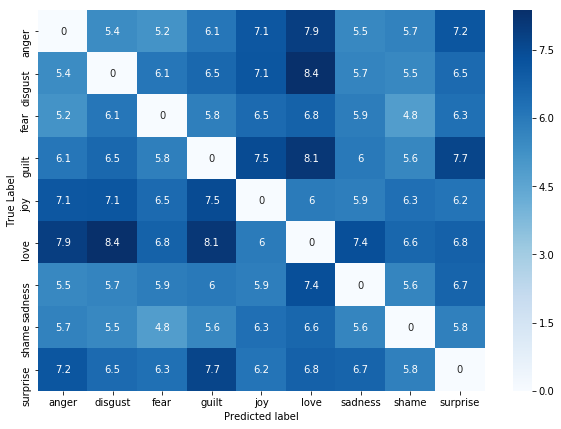

In [117]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(l2_m, annot=True, cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted label')

In [126]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(np.array(label_vec))
X_embedded.shape

(9, 2)

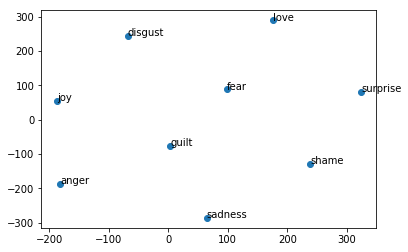

In [128]:
ig, ax = plt.subplots()
ax.scatter(X_embedded[:,0], X_embedded[:, 1])

for i, label in enumerate(labels):
    ax.annotate(label, (X_embedded[i,0], X_embedded[i, 1]))

## Transform sentence to sentence vectors by s-bert

In [59]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

/home/data/ysunbc/anaconda3/envs/yusen/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/data/ysunbc/anaconda3/envs/yusen/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/data/ysunbc/anaconda3/envs/yusen/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/data/ysunbc/anaconda3/envs/y

In [60]:
train_vec = model.encode(list(train_df['sentence']), show_progress_bar=True)
test_vec = model.encode(list(test_df['sentence']), show_progress_bar=True)
train_0_vec = model.encode(list(train_0_df['sentence']), show_progress_bar=True)
sup_vec = model.encode(list(sup_df['sentence']), show_progress_bar=True)
noval_vec = model.encode(list(noval_df['sentence']), show_progress_bar=True)


Batches: 100%|██████████| 250/250 [00:20<00:00, 12.16it/s]


## Save sentence vector to pickle file

In [64]:
train = pd.DataFrame({'label':[label2idx[i] for i in train_df['label']], 'sentvec':train_vec})
test = pd.DataFrame({'label':[label2idx[i] for i in test_df['label']], 'sentvec':test_vec})
train0 = pd.DataFrame({'label':[label2idx[i] for i in train_0_df['label']], 'sentvec':train_0_vec})
sup = pd.DataFrame({'label':[label2idx[i] for i in sup_df['label']], 'sentvec':sup_vec})
noval = pd.DataFrame({'label':[label2idx[i] for i in noval_df['label']], 'sentvec':noval_vec})

In [65]:
train.to_pickle(root + "train_full.pkl")
test.to_pickle(root + "test_full.pkl")
train0.to_pickle(root + "train_0.pkl")
sup.to_pickle(root + "support.pkl")
noval.to_pickle(root + "noval.pkl")